# Objective of the Problem Statement:

The main aim of the dataset is to predict the survival based on some features like age,Cabin,Class etc

# Importing all the Necessary Libraries required for the dataset

In [1405]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [1406]:
df=pd.read_csv('train.csv')

In [1407]:
# Checking the first five rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1408]:
# Checking the shape of the dataset
df.shape

(891, 12)

In [1409]:
# Checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# The first Step in Any Machine Learning Problem Statement is to Handle Missing Values

In [1410]:
#Checking the Missing Values in Dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The Column  Age,Cabin and Embarked has missing values.Now we want to see if the missing values has any impacted on the dependent feature i.e Survived columns.Let see

What are the different Types of Missing Data:-
    
1.Missing Completely at Random, MCAR: A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.


2.Missing Data Not at Random-

There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other


3.Missing Data At Random

Men-hide their salary

Women-hide their Age

In [1411]:
# This is the example of the missing completely at random
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [1412]:
# Here Cabin and Age are missing data not at random.
df['Cabin_null']=np.where(df['Cabin'].isnull(),1,0)

# Find the percentage of missing values in Cabin
df['Cabin_null'].mean()

0.7710437710437711

In [1413]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_null'],
      dtype='object')

In [1414]:
df.groupby('Survived')['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

87% of the data are missing from the non-survived and 60% are missing from the survived

In [1415]:
df.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

All the Technique to handle Missing Values

1.Mean/Median/Mode replacement

2.Random Sample Imputation

3.Capturing NAN with a new Feature

4.End of Distribution Imputation

5.Abritrary Imputation

6.Frequency Category Imputation

# 1. Mean/Median/Mode Replacement

When should we apply?

Mean-Median imputation has the assumption that the data are missing completely at random(MCAR).We solve this be replacing NAN with the most frequent occurence of the variables

In [1416]:
df1=df.copy()

In [1417]:
# Let go and see the percentage of missing values
df1.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
Cabin_null     0.000000
dtype: float64

In [1418]:
# Making a Function to impute the values of NAN
def impute_nan(df,variables,median):
    df[variables+'_median']=df[variables].fillna(median)

In [1419]:
# Checking the value of median in Age columns and storing it in variable median
median=df1.Age.median()

In [1420]:
# Apply the function and imputing it using median because median is the best method even if it has outliers
impute_nan(df1,'Age',median)

In [1421]:
# Checking if it is correctly imputed or not
df1[['Age','Age_median']].head(10)

,Age,Age_median
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
5,NaN,28.0
6,54.0,54.0
7,2.0,2.0
8,27.0,27.0
9,14.0,14.0


In [1422]:
# Checking the standard deviation of both column (Age,Age_median)
print(df1.Age.std())
print(df1.Age_median.std())

14.526497332334044
13.019696550973194


In [1423]:
# Checking if the imputation has some effects of dependent variable and surely it has some relationship.
df1.groupby('Survived')['Age_median'].mean()

Survived
0    30.028233
1    28.291433
Name: Age_median, dtype: float64

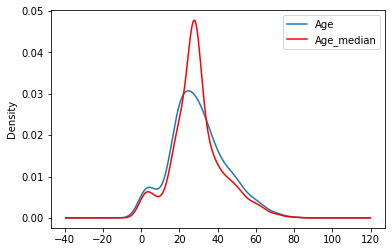

In [1424]:
# Checking the visualization of the original_columns(Age) and imputed_columns(Age_median)
fig=plt.figure()
ax=fig.add_subplot(111)
df1.Age.plot(kind='kde',ax=ax)
df1.Age_median.plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
plt.show()


Advantages of :-

1.Easy to implement(Robust to outliers)

2.Faster way to obtain the complete dataset

Disadvantages

3.Change or Distortion in the original variance

4.Impacts Correlation

# Random Sample Imputation

Aim:-

Random Sample Imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When it should be used:

I assume that data are missing completely at random(MCAR)

In [1425]:
df2=df.copy()

In [1426]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [1427]:
df2['Age'].isnull().mean()

0.19865319865319866

In [1428]:
# Here is the nan values replaced  by the random sample imputation
df2['Age'].dropna().sample(df2['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [1429]:
# Applying the function:-
def impute_nan(df,variables,median):
    df[variables+'_median']=df[variables].fillna(median)
    df[variables+'_random']=df[variables]
    # It will have the random sample to fill the na
    random_sample=df[variables].dropna().sample(df[variables].isnull().sum(),random_state=0)
    ##pandas need to have same index to merge the dataset
    random_sample.index=df[df[variables].isnull()].index
    df.loc[df[variables].isnull(),variables+'_random']=random_sample

In [1430]:
median=df2.Age.median()
median

28.0

In [1431]:
impute_nan(df2,'Age',median)

In [1432]:
df2[['Age','Age_median','Age_random']].head(20)

,Age,Age_median,Age_random
0,22.0,22.0,22.00
1,38.0,38.0,38.00
2,26.0,26.0,26.00
3,35.0,35.0,35.00
4,35.0,35.0,35.00
5,NaN,28.0,28.00
6,54.0,54.0,54.00
7,2.0,2.0,2.00
8,27.0,27.0,27.00
9,14.0,14.0,14.00


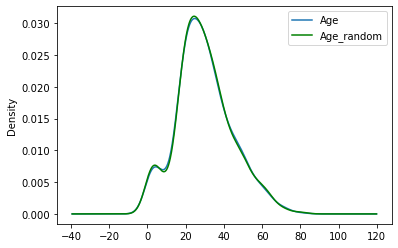

In [1433]:
# Visualization of Age vs Age_random variable
fig = plt.figure() 
ax = fig.add_subplot(111) 
df2['Age'].plot(kind='kde', ax=ax) 
df2.Age_random.plot(kind='kde', ax=ax, color='green') 
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
plt.show()

ADVANTAGES:

1.Easy to implement

2.There is less distortion in variance

DISADVANTAGES:-

1.In every situation randomness won't' work

# Capturing NAN value with a new feature

It work well if the data are missing completely at random(MCAR)

In [1434]:
df3=df.copy()

In [1435]:
# This will create another feature with Age_NAN and wherever there is missing values it will considered it as 1
df3['Age_NAN']=np.where(df3['Age'].isnull(),1,0)

In [1436]:
df3[['Age','Age_NAN']].head(15)

,Age,Age_NAN
0,22.0,0
1,38.0,0
2,26.0,0
3,35.0,0
4,35.0,0
5,NaN,1
6,54.0,0
7,2.0,0
8,27.0,0
9,14.0,0


In [1437]:
median=df3.Age.median()
median

28.0

In [1438]:
df3['Age'].fillna(df3.Age.median(),inplace=True)

In [1439]:
df3[['Age','Age_NAN']].head(15)

,Age,Age_NAN
0,22.0,0
1,38.0,0
2,26.0,0
3,35.0,0
4,35.0,0
5,28.0,1
6,54.0,0
7,2.0,0
8,27.0,0
9,14.0,0



Advantages:-

1.Easy to implement

2.Capture the importance of missing values

DisAdvantages:-

1.It is creating Additional Feature(Curse of Dimensionality)

# End of Distribution Imputation

In [1440]:
df4=df.copy()

In [1441]:
median=df4.Age.median()

<AxesSubplot:xlabel='Age'>

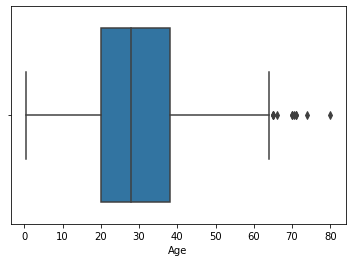

In [1442]:
sns.boxplot(df4['Age'])

In [1443]:
# This is the extreme value of the dataset.
#As per the rule if it is after 3 std then we will consider it extreme value
extreme_value=df4.Age.mean()+3*df4.Age.std()

In [1444]:
def impute_nan(df,variables,median,extreme_value):
    df[variables+'_endofdist']=df[variables].fillna(extreme_value)
    df[variables].fillna(median,inplace=True)

In [1445]:
impute_nan(df4,'Age',median,extreme_value)

In [1446]:
df4[['Age','Age_endofdist']]

,Age,Age_endofdist
0,22.0,22.00000
1,38.0,38.00000
2,26.0,26.00000
3,35.0,35.00000
4,35.0,35.00000
...,...,...
886,27.0,27.00000
887,19.0,19.00000
888,28.0,73.27861
889,26.0,26.00000


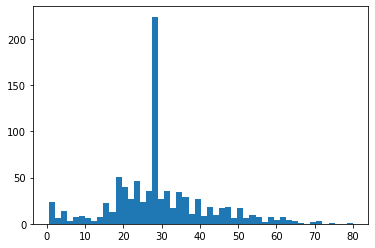

In [1447]:
# Checking the distribution of the Age columns 
plt.hist(df4['Age'],bins=50)
plt.show()

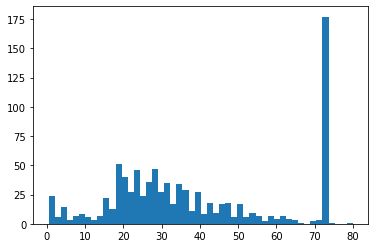

In [1448]:
# Checking the distribution of the Age_dist columns
plt.hist(df4['Age_endofdist'],bins=50)
plt.show()

<AxesSubplot:xlabel='Age_endofdist'>

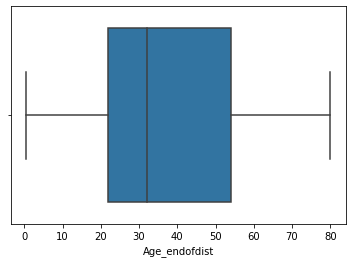

In [1449]:
# This distribution has handled outliers well.
sns.boxplot(df4['Age_endofdist'])


from this imputation we were sucessfully able to handle outliers

Advantages:-

1.Easy to implement

2.Capture the importance of missingness if there is one

DisAdvantages:-

1.Distort the original distribution of the variable

2.If missingness is not important,it may mask the predictive power of the original distribution by distortinng its distribution

3.If the number of NA is big,it will mask true outliers in the distribution

4.If the number of NA is small,the replaced NA may be considered an outlier and pre-processed in the subsequent feature engineering

# Arbritary Imputation:-

When to apply?

Replacing the NA by arbitrary value should be used when there are reason to believe that the NA is not missing at random.In
Situation like this,we would not like to replace it with the median or mean and therefore make the NA look like the majority of 
our observation.Instead we want to flag the fact that observation is missing.

In [1450]:
df5=df.copy()

In [1451]:
df5['Age'].dtypes

dtype('float64')

In [1452]:
# Imputing A Number 99 which we can see that the value is missing
df5['Age']=df5['Age'].fillna(99)

In [1453]:
df5['Age'].head(15)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5     99.0
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
Name: Age, dtype: float64

In [1454]:
# We can clearly see that you can't use mean here because the mean is sensitive to outilers
df5['Age'].mean()

43.465959595959596

In [1455]:
# The median is significantly handling outliers 
median=df5.Age.median()
median

32.0

<AxesSubplot:xlabel='Age'>

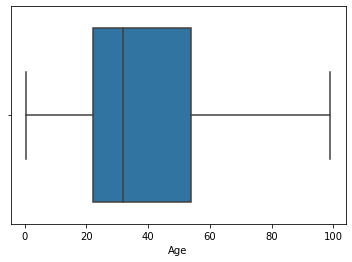

In [1456]:
sns.boxplot(df5['Age'])

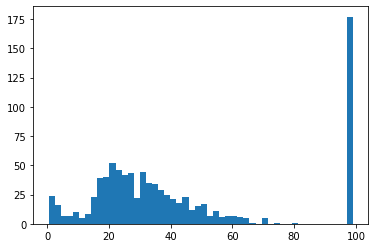

In [1457]:
# This is clearly disturbing the distribution of the Age columns and now the dataset which was almost normally 
#distributed is converted into left skewed distribution due to the presence of value 99(missing)
plt.hist(df5['Age'],bins=50)
plt.show()

Advanatages:-

1. Easy to implement

2. Faster way to obtain the complete dataset

3. Can be integrated into production(model deployment)

4. Capture the importance of missingness if there is one

DisAdvantages:-

1. Distortion of the original variable

2. Distortion of the Original Variance

3. Distortion of the co-variance with the remaining variables of the dataset

4. If the arbritary value is at the end of the distribution it may mask or create outliers

5. Need to be careful not to choose an arbitrary value too similar to mean or median(or any after common value of the variable distribution)

Frequent Category Imputation:-
    
When to Apply?

We can use this method  when daata is missing completely at random and not more than 5% of the variable containing 
missing data


Assumption:-
    
1. Data is missing at random.

2. The missing observation most likely look like the majority of the observation(i.e mode)


Advantages:-
    
1. Easy to implement

2. It is the fast way to obtain a complete dataset

3. It can be used in production(i.e during model deployment)


DisAdvantages:-
    
1. It distort the relation of the most frequent label with the other variables of the dataset

2. May lead to an over-representation of the most frequent label if there is a lot of missing value

In [1458]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Cabin_null       0
Age_median       0
dtype: int64

In [1459]:
df1.drop(['Age'],axis=1,inplace=True)

In [1460]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Cabin_null       0
Age_median       0
dtype: int64

# Now Handle Missing Value of Two other variable Like Cabin and Embarked

In [1461]:
# Here for Embarked columns we can either replace it with frequent category or drop the 2 rows
df1['Embarked'].dropna(inplace=True)

In [1462]:
df1['Embarked'].isnull().sum()

0

In [1463]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Cabin_null       0
Age_median       0
dtype: int64

In [1464]:
# For time sack it will drop Cabin columns
df1['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [1465]:
#Now we will drop all the irrelevant variable like Name,Ticket,Cabin,Passenger_ID
df1.drop(['Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)

In [1466]:
df1.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Cabin_null', 'Age_median'],
      dtype='object')

# 2.Now that we have handled our missing values,the next step to understand the relation of each independent feature with dependent feature 

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

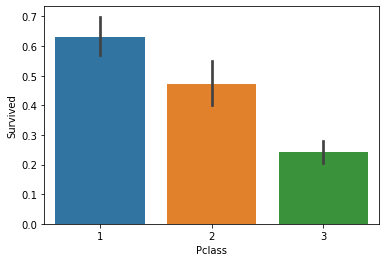

In [1467]:
sns.barplot(x=df['Pclass'],y=df['Survived'])

PClass with 1 class has more chance of survival chance of 60% than the other two classes (2 and 3) which has survival chance of 
45% and 20%

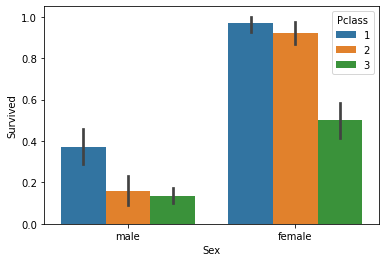

In [1468]:
sns.barplot(x=df1['Sex'],y=df1['Survived'],hue=df1['Pclass'])
plt.show()

Female has more survival chance than male

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

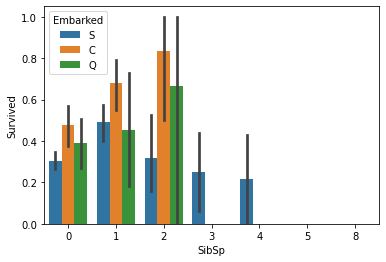

In [1469]:
sns.barplot(x=df1['SibSp'],y=df1['Survived'],hue=df1['Embarked'])

Sibling/Spouse with 0,1,2 have higher chance of survival chance than 3 and 4 

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

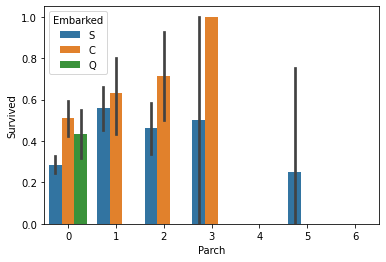

In [1470]:
# (PArch)-Number of Parents/Children Aboard.
sns.barplot(x=df1['Parch'],y=df1['Survived'],hue=df1['Embarked'])

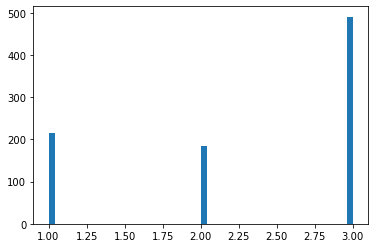

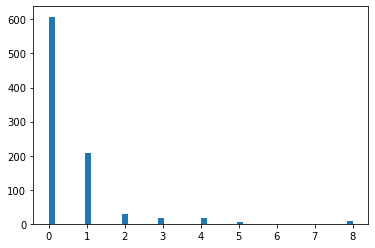

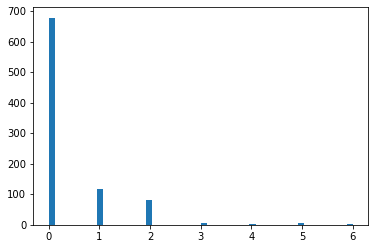

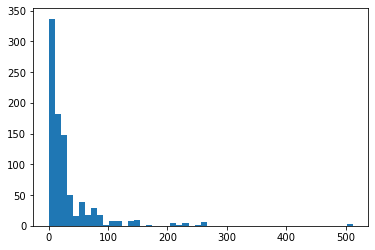

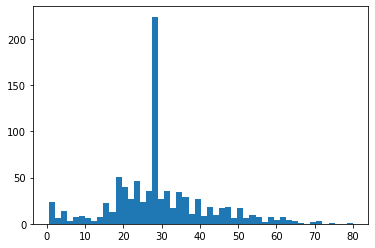

In [1471]:
# Checking the distribution of the columns
columns=['Pclass','SibSp','Parch','Fare','Age_median']
for i in columns:
    plt.hist(df1[i],bins=50)
    plt.show()

All the columns in the dataset are skewed.

<AxesSubplot:xlabel='Age_median'>

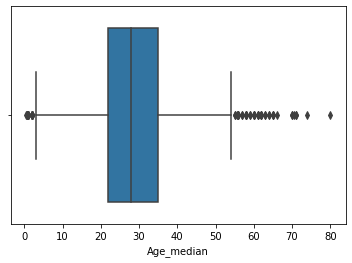

In [1472]:
# Now that I understand a Little bit about the data.So Now its we will handle outliers in the dataset.
sns.boxplot(df1['Age_median'])

In [1473]:
lower_bridge=df1.Age_median.mean()- 3*df1.Age_median.std()

In [1474]:
upper_bridge=df1.Age_median.mean() + 3*df1.Age_median.std()

In [1475]:
df1[df1['Age_median']>68.42]

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Cabin_null,Age_median
96,0,1,male,0,0,34.6542,C,0,71.0
116,0,3,male,0,0,7.7500,Q,1,70.5
493,0,1,male,0,0,49.5042,C,1,71.0
630,1,1,male,0,0,30.0000,S,0,80.0
672,0,2,male,0,0,10.5000,S,1,70.0
745,0,1,male,1,1,71.0000,S,0,70.0
851,0,3,male,0,0,7.7750,S,1,74.0


In [1476]:
split_age=df1[df1['Age_median']<68.42]
split_age

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Cabin_null,Age_median
0,0,3,male,1,0,7.2500,S,1,22.0
1,1,1,female,1,0,71.2833,C,0,38.0
2,1,3,female,0,0,7.9250,S,1,26.0
3,1,1,female,1,0,53.1000,S,0,35.0
4,0,3,male,0,0,8.0500,S,1,35.0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,1,27.0
887,1,1,female,0,0,30.0000,S,0,19.0
888,0,3,female,1,2,23.4500,S,1,28.0
889,1,1,male,0,0,30.0000,C,0,26.0


In [1477]:
#Let's compute the Inter-Quartile Range to calculate the boundaries
IQR=df1.Age_median.quantile(0.75) - df1.Age_median.quantile(0.25)
IQR

13.0

In [1478]:
# Let compute the lower_boundary and upper_boundary
lower_boundary=df1.Age_median.quantile(0.25) - (IQR*1.5)
upper_boundary=df1.Age_median.quantile(0.75) + (IQR*1.5)
print('The lower boundary of the Age is:',lower_boundary)
print('The upper boundary of the Age is:',upper_boundary)

The lower boundary of the Age is: 2.5
The upper boundary of the Age is: 54.5


In [1479]:
# Extreme Value
lower_bridge=df1.Age_median.quantile(0.25)-(IQR*3)
upper_bridge=df1.Age_median.quantile(0.75)+(IQR*3)
print('The lower boundary of the Age is:',lower_bridge)
print('The upper boundary of the Age is:',upper_bridge)

The lower boundary of the Age is: -17.0
The upper boundary of the Age is: 74.0


<AxesSubplot:xlabel='Fare'>

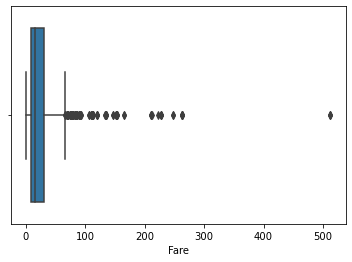

In [1480]:
# Checking the outliers using Visualization
sns.boxplot(df1['Fare'])

In [1481]:
lower_boundary=df1.Fare.quantile(0.25) - (IQR*1.5)
upper_boundary=df1.Fare.quantile(0.75) + (IQR*1.5)
print(lower_boundary)
print(upper_boundary)

-11.5896
50.5


In [1482]:
split_Fare=df1[df1['Fare']<50]
split_Fare

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Cabin_null,Age_median
0,0,3,male,1,0,7.2500,S,1,22.0
2,1,3,female,0,0,7.9250,S,1,26.0
4,0,3,male,0,0,8.0500,S,1,35.0
5,0,3,male,0,0,8.4583,Q,1,28.0
7,0,3,male,3,1,21.0750,S,1,2.0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,1,27.0
887,1,1,female,0,0,30.0000,S,0,19.0
888,0,3,female,1,2,23.4500,S,1,28.0
889,1,1,male,0,0,30.0000,C,0,26.0


In [1483]:
#df1.drop(['Cabin_null'],axis=1,inplace=True)

 Doubt in Handling Outliers Properly

# Now We will proceed toward handling Categorical Features in the Dataset

In [1484]:
# Columns which should be handled are Sex,Embarked.Here we will use onehot_encoding.
# drop_first=True to handle Dummy Variable Trap
sex_encoding=pd.get_dummies(df1['Sex'],prefix='Sex_',drop_first=True)
sex_encoding

,Sex__male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [1485]:
em_encoding=pd.get_dummies(df1['Embarked'],drop_first=True)
em_encoding

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [1486]:
# Now we will merge the columns
df_titanic=pd.concat([df1,sex_encoding,em_encoding],axis=1)
df_titanic

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Cabin_null,Age_median,Sex__male,Q,S
0,0,3,male,1,0,7.2500,S,1,22.0,1,0,1
1,1,1,female,1,0,71.2833,C,0,38.0,0,0,0
2,1,3,female,0,0,7.9250,S,1,26.0,0,0,1
3,1,1,female,1,0,53.1000,S,0,35.0,0,0,1
4,0,3,male,0,0,8.0500,S,1,35.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,1,27.0,1,0,1
887,1,1,female,0,0,30.0000,S,0,19.0,0,0,1
888,0,3,female,1,2,23.4500,S,1,28.0,0,0,1
889,1,1,male,0,0,30.0000,C,0,26.0,1,0,0


In [1487]:
# Now we will drop Sex,Embarked columns
df_titanic.drop(['Sex','Embarked'],axis=1,inplace=True)

In [1488]:
#Now we will handle Feature to make them normally distributed using Some Feature Transformation Techniques Like Logarithmic 
#Transformation,Square-Root Transformation,Reciprocal Transformation etc.
df10=df_titanic.copy()

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

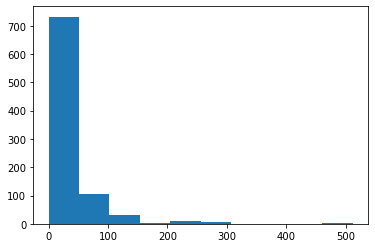

In [1489]:
plt.hist(df_titanic['Fare'])

In [1490]:
##If we want to  check whether the feature is guassian or normally distributed then we use Q-Q plot
import scipy.stats as stat
import pylab
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

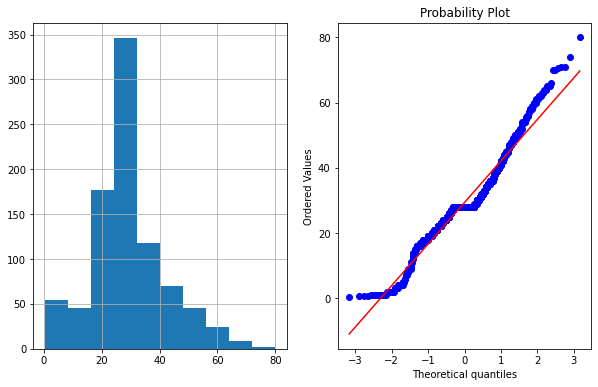

In [1491]:
plot_data(df10,'Age_median')

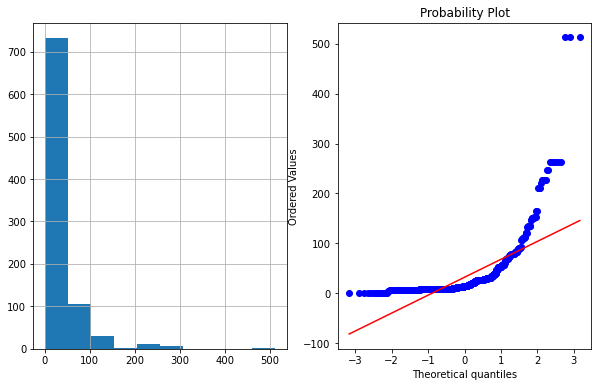

In [1492]:
plot_data(df10,'Fare')

In [1493]:
# Using Logarithmic Transformation
df10['Age_log']=np.log(df10['Age_median'])

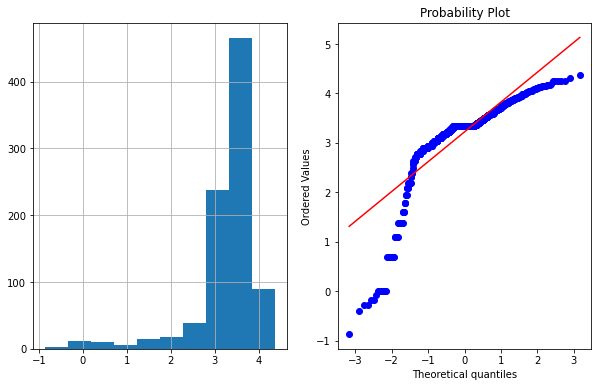

In [1494]:
plot_data(df10,'Age_log')

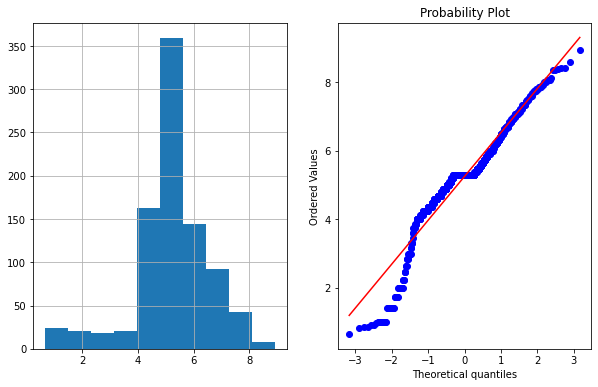

In [1495]:
# Using Square_Root Transformation
df10['Age_square']=df10.Age_median**(1/2)
plot_data(df10,'Age_square')

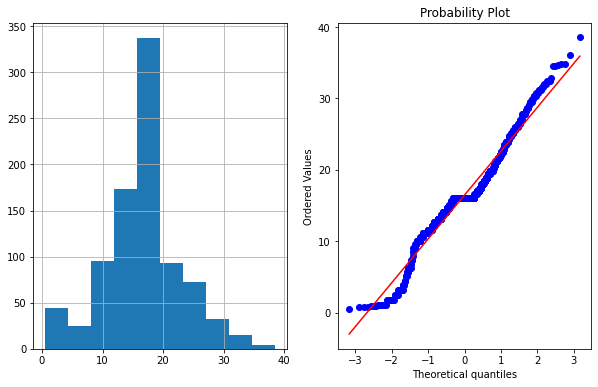

In [1496]:
# Using Exponential Transformation
df10['Age_exponential']=df10.Age_median**(1/1.2)
plot_data(df10,'Age_exponential')

In [1497]:
###BOX-COX TRANSFORMATION
df10['Age_boxcox'],parameters=stat.boxcox(df10['Age_median'])

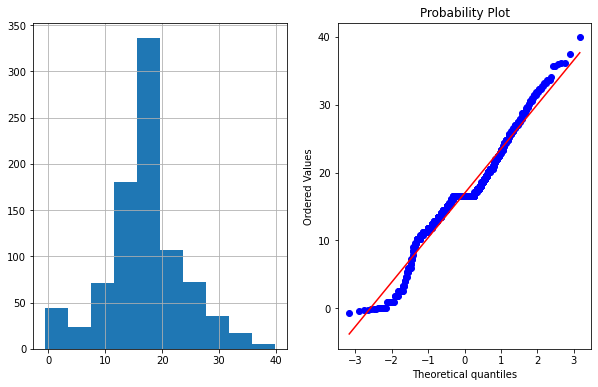

In [1498]:
plot_data(df10,'Age_boxcox')

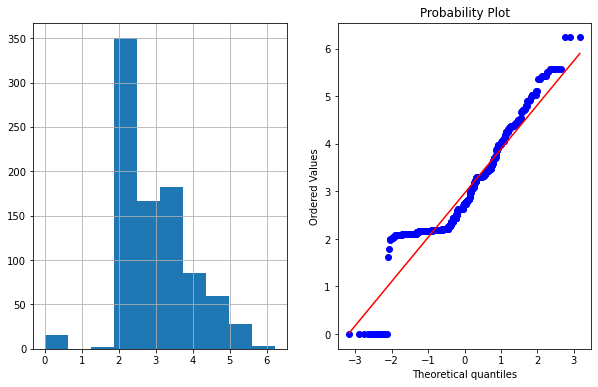

In [1499]:
df10['Fare_log']=np.log1p(df10['Fare'])
plot_data(df10,'Fare_log')

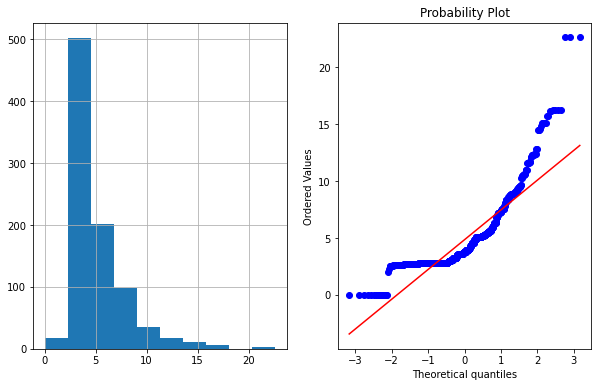

In [1500]:
df10['Faresq_root']=df10.Fare**(1/2)
plot_data(df10,'Faresq_root')

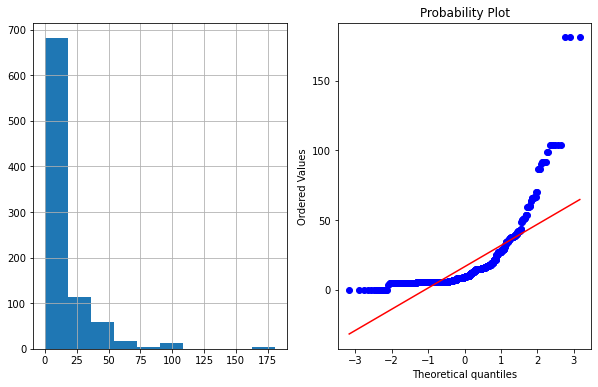

In [1501]:
df10['Fare_exponential']=df10.Fare**(1/1.2)
plot_data(df10,'Fare_exponential')

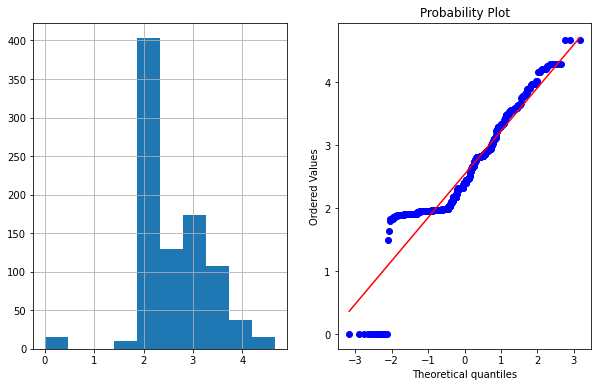

In [1502]:
df10['Fare_boxcox'],parameters=stat.boxcox(df10['Fare']+1)
plot_data(df10,'Fare_boxcox')

In [1503]:
df_titanic.head()

,Survived,Pclass,SibSp,Parch,Fare,Cabin_null,Age_median,Sex__male,Q,S
0,0,3,1,0,7.2500,1,22.0,1,0,1
1,1,1,1,0,71.2833,0,38.0,0,0,0
2,1,3,0,0,7.9250,1,26.0,0,0,1
3,1,1,1,0,53.1000,0,35.0,0,0,1
4,0,3,0,0,8.0500,1,35.0,1,0,1


In [1504]:
df_titanic['Fare']=np.log1p(df_titanic['Fare'])

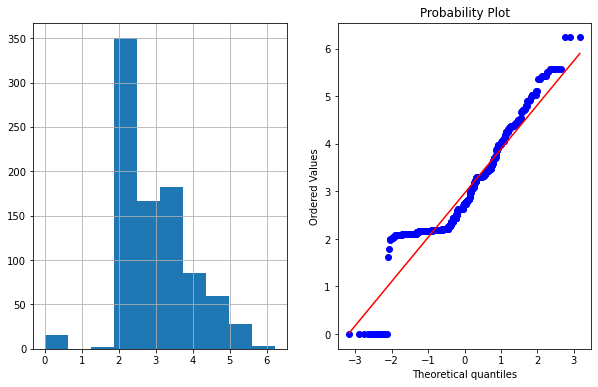

In [1505]:
plot_data(df_titanic,'Fare')

In [1506]:
df_titanic['Fare'].describe()

count    891.000000
mean       2.962246
std        0.969048
min        0.000000
25%        2.187218
50%        2.737881
75%        3.465736
max        6.240917
Name: Fare, dtype: float64

# Now as Our Feature have big value it will not converge to global minima point of Gradient Descent we need to handle it usingFeature magnitude Techniques like StandardScaler,MinMaxScaler and RobustScaler

In [1507]:
# Using StandardScaler

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_titanic)

In [1508]:
df_t=pd.DataFrame(df_scaled)

In [1509]:
df_t

,0,1,2,3,4,5,6,7,8,9
0,-0.789272,0.827377,0.432793,-0.473674,-0.879741,0.544925,-0.565736,0.737695,-0.307562,0.619306
1,1.266990,-1.566107,0.432793,-0.473674,1.361220,-1.835115,0.663861,-1.355574,-0.307562,-1.614710
2,1.266990,0.827377,-0.474545,-0.473674,-0.798540,0.544925,-0.258337,-1.355574,-0.307562,0.619306
3,1.266990,-1.566107,0.432793,-0.473674,1.062038,-1.835115,0.433312,-1.355574,-0.307562,0.619306
4,-0.789272,0.827377,-0.474545,-0.473674,-0.784179,0.544925,0.433312,0.737695,-0.307562,0.619306
...,...,...,...,...,...,...,...,...,...,...
886,-0.789272,-0.369365,-0.474545,-0.473674,-0.333698,0.544925,-0.181487,0.737695,-0.307562,0.619306
887,1.266990,-1.566107,-0.474545,-0.473674,0.487082,-1.835115,-0.796286,-1.355574,-0.307562,0.619306
888,-0.789272,0.827377,0.432793,2.008933,0.242007,0.544925,-0.104637,-1.355574,-0.307562,0.619306
889,1.266990,-1.566107,-0.474545,-0.473674,0.487082,-1.835115,-0.258337,0.737695,-0.307562,-1.614710


In [1510]:
df_titanic.columns

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Cabin_null',
       'Age_median', 'Sex__male', 'Q', 'S'],
      dtype='object')

In [1511]:
df_t.rename(columns={0:'Survived', 1:'Pclass', 2:'SibSp', 3:'Parch', 4:'Fare', 5:'Cabin_null',
       6:'Age_median', 7:'Sex__male',8:'Q',9:'S'},inplace=True)

In [1512]:
df_t.columns

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Cabin_null',
       'Age_median', 'Sex__male', 'Q', 'S'],
      dtype='object')

In [1513]:
df_t.drop(['Cabin_null'],axis=1,inplace=True)

In [1514]:
df_t.head()

,Survived,Pclass,SibSp,Parch,Fare,Age_median,Sex__male,Q,S
0,-0.789272,0.827377,0.432793,-0.473674,-0.879741,-0.565736,0.737695,-0.307562,0.619306
1,1.266990,-1.566107,0.432793,-0.473674,1.361220,0.663861,-1.355574,-0.307562,-1.614710
2,1.266990,0.827377,-0.474545,-0.473674,-0.798540,-0.258337,-1.355574,-0.307562,0.619306
3,1.266990,-1.566107,0.432793,-0.473674,1.062038,0.433312,-1.355574,-0.307562,0.619306
4,-0.789272,0.827377,-0.474545,-0.473674,-0.784179,0.433312,0.737695,-0.307562,0.619306


In [1515]:
#Using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
df_minmax=minmax.fit_transform(df_titanic)

In [1516]:
df_mima=pd.DataFrame(df_minmax)

In [1517]:
df_mima.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.125,0.0,0.338125,1.0,0.271174,1.0,0.0,1.0
1,1.0,0.0,0.125,0.0,0.685892,0.0,0.472229,0.0,0.0,0.0
2,1.0,1.0,0.000,0.0,0.350727,1.0,0.321438,0.0,0.0,1.0
3,1.0,0.0,0.125,0.0,0.639463,0.0,0.434531,0.0,0.0,1.0
4,0.0,1.0,0.000,0.0,0.352955,1.0,0.434531,1.0,0.0,1.0


In [1518]:
df_mima.rename(columns={0:'Survived', 1:'Pclass', 2:'SibSp', 3:'Parch', 4:'Fare', 5:'Cabin_null',
       6:'Age_median', 7:'Sex__male',8:'Q',9:'S'},inplace=True)

In [1519]:
df_mima.head()

,Survived,Pclass,SibSp,Parch,Fare,Cabin_null,Age_median,Sex__male,Q,S
0,0.0,1.0,0.125,0.0,0.338125,1.0,0.271174,1.0,0.0,1.0
1,1.0,0.0,0.125,0.0,0.685892,0.0,0.472229,0.0,0.0,0.0
2,1.0,1.0,0.000,0.0,0.350727,1.0,0.321438,0.0,0.0,1.0
3,1.0,0.0,0.125,0.0,0.639463,0.0,0.434531,0.0,0.0,1.0
4,0.0,1.0,0.000,0.0,0.352955,1.0,0.434531,1.0,0.0,1.0


In [1520]:
#Now splitting dataset into independent and Dependent features
X=df_mima.drop(['Survived'],axis=1)
y=df_mima.Survived

In [1521]:
# Independent Feature
X.head()

,Pclass,SibSp,Parch,Fare,Cabin_null,Age_median,Sex__male,Q,S
0,1.0,0.125,0.0,0.338125,1.0,0.271174,1.0,0.0,1.0
1,0.0,0.125,0.0,0.685892,0.0,0.472229,0.0,0.0,0.0
2,1.0,0.000,0.0,0.350727,1.0,0.321438,0.0,0.0,1.0
3,0.0,0.125,0.0,0.639463,0.0,0.434531,0.0,0.0,1.0
4,1.0,0.000,0.0,0.352955,1.0,0.434531,1.0,0.0,1.0


In [1522]:
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [1590]:
#Now splitting dataset into training and testing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
print('The training data is:',X_train.shape,y_train.shape)
print('The testing data is:',X_test.shape,y_test.shape)

The training data is: (623, 9) (623,)
The testing data is: (268, 9) (268,)


In [1591]:
# Now we are creating Model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [1592]:
model.fit(X_train,y_train)

LogisticRegression()

In [1593]:
# Now we are predicting.
y_pred=model.predict(X_test)

In [1594]:
# Checking the accuracy of the model
from sklearn.metrics import accuracy_score
print("Train Accuracy :: ", accuracy_score(y_train, model.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(y_pred, y_test))

Train Accuracy ::  0.8138041733547352
Test Accuracy  ::  0.7761194029850746


In [1595]:
# Checking the confusion matrix 
from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_pred,y_test)
print(confusion_m)

[[130  37]
 [ 23  78]]


In [1596]:
from sklearn.metrics import classification_report
classification_report=classification_report(y_pred,y_test)
print(classification_report)

              precision    recall  f1-score   support

         0.0       0.85      0.78      0.81       167
         1.0       0.68      0.77      0.72       101

    accuracy                           0.78       268
   macro avg       0.76      0.78      0.77       268
weighted avg       0.79      0.78      0.78       268



In [1597]:
# Tuning the model using GridSearchCV
# define models and parameters
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
model_lm = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_lm, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.797241 using {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.793134 (0.037328) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.793134 (0.037328) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.793134 (0.037328) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.795747 (0.037342) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.795747 (0.037342) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.797241 (0.037414) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.796866 (0.038243) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.796866 (0.038243) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.794998 (0.042162) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.791232 (0.042437) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.791232 (0.042437) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.786375 (0.046113) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.734007 (0.027935) with

In [1531]:
from sklearn.linear_model import RidgeClassifier
# define models and parameters
model_rg = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
grid_search = GridSearchCV(estimator=model_rg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X,y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.797564 using {'alpha': 1.0}
0.796889 (0.043947) with: {'alpha': 0.1}
0.796777 (0.044016) with: {'alpha': 0.2}
0.796777 (0.044016) with: {'alpha': 0.3}
0.796889 (0.044318) with: {'alpha': 0.4}
0.797001 (0.044420) with: {'alpha': 0.5}
0.797226 (0.044508) with: {'alpha': 0.6}
0.797227 (0.044417) with: {'alpha': 0.7}
0.797227 (0.044700) with: {'alpha': 0.8}
0.797340 (0.044574) with: {'alpha': 0.9}
0.797564 (0.044858) with: {'alpha': 1.0}


In [1598]:
# Using KNN Algorithms
from sklearn.neighbors import KNeighborsClassifier
model_km = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_km, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.805814 using {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
0.754948 (0.039771) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.754948 (0.039771) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.799825 (0.032802) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.784503 (0.036820) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.803575 (0.041974) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.791993 (0.040915) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.803562 (0.038872) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.797978 (0.042151) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.788227 (0.033286) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.801336 (0.040489) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.792355 (

In [1599]:
# Creating A Model using KNN
model_km=KNeighborsClassifier(metric='manhattan', n_neighbors= 19, weights= 'uniform')
model_km.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=19)

In [1600]:
# Predicting the model on test data
y_pr=model_km.predict(X_test)

In [1601]:
# Checking the accuracy of the model
print("Train Accuracy :: ", accuracy_score(y_train, model_km.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(y_pr, y_test))

Train Accuracy ::  0.8394863563402889
Test Accuracy  ::  0.7574626865671642


In [1602]:
# confusion matrix
confusion=confusion_matrix(y_pr,y_test)
confusion

array([[140,  52],
       [ 13,  63]], dtype=int64)

In [1603]:
# Using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(max_features= 'log2', n_estimators= 100)
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_features='log2')

In [1604]:
# predicting the model
y_pred_test=model_rf.predict(X_test)
y_pred_test

array([1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1.

In [1605]:
# checking accuracy of the model
print("Train Accuracy :: ", accuracy_score(y_train, model_rf.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(y_pred_test, y_test))

Train Accuracy ::  0.9903691813804173
Test Accuracy  ::  0.7910447761194029


In [1606]:
#Checking the accuracy of the model
confusi=confusion_matrix(y_test,y_pred_test)
confusi

array([[137,  16],
       [ 40,  75]], dtype=int64)

In [1607]:
# Classification report of Logistic Regression Model
from sklearn.metrics import classification_report
classification_report=classification_report(y_pred,y_test)
print(classification_report)

              precision    recall  f1-score   support

         0.0       0.85      0.78      0.81       167
         1.0       0.68      0.77      0.72       101

    accuracy                           0.78       268
   macro avg       0.76      0.78      0.77       268
weighted avg       0.79      0.78      0.78       268



In [1608]:
# Classification report of Random Forest Model
from sklearn.metrics import classification_report
classification=classification_report(y_pred_test,y_test)
print(classification)

              precision    recall  f1-score   support

         0.0       0.90      0.77      0.83       177
         1.0       0.65      0.82      0.73        91

    accuracy                           0.79       268
   macro avg       0.77      0.80      0.78       268
weighted avg       0.81      0.79      0.80       268



In [1609]:
from sklearn.metrics import classification_report
classif_km=classification_report(y_pr,y_test)
print(classif_km)

              precision    recall  f1-score   support

         0.0       0.92      0.73      0.81       192
         1.0       0.55      0.83      0.66        76

    accuracy                           0.76       268
   macro avg       0.73      0.78      0.74       268
weighted avg       0.81      0.76      0.77       268



In [1610]:
# Tuning Random-Forest
# define models and parameters
model_rf_hm = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_rf_hm, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.813670 using {'max_features': 'sqrt', 'n_estimators': 100}
0.808452 (0.029822) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.813670 (0.029455) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.812555 (0.028493) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.803958 (0.034264) with: {'max_features': 'log2', 'n_estimators': 10}
0.810682 (0.032530) with: {'max_features': 'log2', 'n_estimators': 100}
0.810300 (0.032419) with: {'max_features': 'log2', 'n_estimators': 1000}


# Total impurity of leaves vs effective alphas of pruned tree

Minimal cost complexity pruning recursively finds the node with the “weakest link”. The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [1611]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

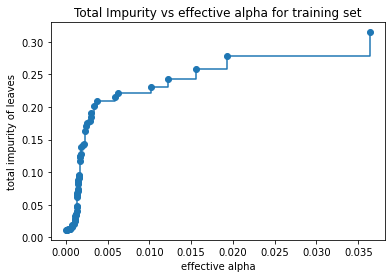

In [1612]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [1613]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.1486931782834916


For the remainder of this example, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

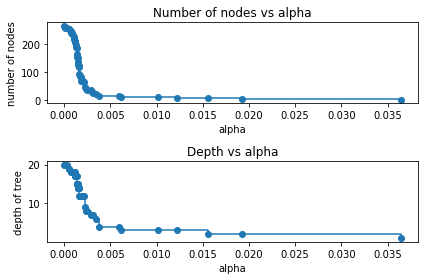

In [1614]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Accuracy vs alpha for training and testing sets

When ccp_alpha is set to zero and keeping the other default parameters of DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting ccp_alpha=0.015 maximizes the testing accuracy.

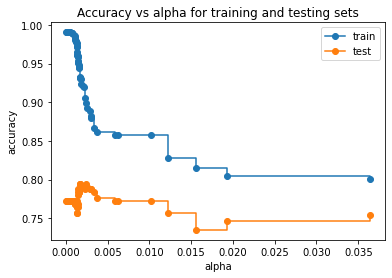

In [1615]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas,test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [1616]:
# making A Random Forest Model with ccp_alpha as a parameters

model_random=RandomForestClassifier(max_features= 'log2', n_estimators= 100,ccp_alpha=0.005)
model_random.fit(X_train,y_train)

RandomForestClassifier(ccp_alpha=0.005, max_features='log2')

In [1617]:
#predicting the model
y_pred_t=model_random.predict(X_test)
y_pred_t

array([1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [1618]:
# Checking the accuracy of the model(Handle Overfitting condition using Post Pruning with cost complexity pruning)
print("Train Accuracy :: ", accuracy_score(y_train, model_random.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(y_pred_t, y_test))

Train Accuracy ::  0.8651685393258427
Test Accuracy  ::  0.7798507462686567


In [1619]:
# Checking the confusion matrix
conn=confusion_matrix(y_test,y_pred_t)
conn

array([[142,  11],
       [ 48,  67]], dtype=int64)

In [1625]:
class_pruning=classification_report(y_pred_t,y_test)
print(class_pruning)

              precision    recall  f1-score   support

         0.0       0.93      0.75      0.83       190
         1.0       0.58      0.86      0.69        78

    accuracy                           0.78       268
   macro avg       0.76      0.80      0.76       268
weighted avg       0.83      0.78      0.79       268



In [1620]:
# Tuning Using DecisionTreeClassifier
model_dm=DecisionTreeClassifier(ccp_alpha=0.005)
model_dm.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.005)

In [1621]:
#predicting the model
y_dt=model_dm.predict(X_test)

In [1622]:
# checking the accuracy of the model
print("Train Accuracy :: ", accuracy_score(y_train, model_dm.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(y_pred_t, y_test))

Train Accuracy ::  0.8619582664526485
Test Accuracy  ::  0.7798507462686567


In [1623]:
# Checking the confusion matrix
conn_1=confusion_matrix(y_test,y_dt)
conn_1

array([[142,  11],
       [ 49,  66]], dtype=int64)

In [1624]:
#Classification report
cla=classification_report(y_test,y_dt)
print(cla)

              precision    recall  f1-score   support

         0.0       0.74      0.93      0.83       153
         1.0       0.86      0.57      0.69       115

    accuracy                           0.78       268
   macro avg       0.80      0.75      0.76       268
weighted avg       0.79      0.78      0.77       268



In [1628]:
from sklearn.ensemble import BaggingClassifier
# define models and parameters
model_bagging = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.814049 using {'n_estimators': 100}
0.810695 (0.033746) with: {'n_estimators': 10}
0.814049 (0.031791) with: {'n_estimators': 100}
0.813304 (0.029560) with: {'n_estimators': 1000}


In [1659]:
# Using Bagging Techniques
model_bag=BaggingClassifier(base_estimator=RandomForestClassifier(ccp_alpha=0.005),n_estimators=10,random_state=1)
model_bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(ccp_alpha=0.005),
                  random_state=1)

In [1660]:
#predicting the model
y_bag=model_bag.predict(X_test)

In [1661]:
#Checking the accuracy of the Bagging Model
print("Train Accuracy :: ", accuracy_score(y_train, model_bag.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(y_bag, y_test))

Train Accuracy ::  0.8780096308186196
Test Accuracy  ::  0.7723880597014925


In [1662]:
class_bag=classification_report(y_bag,y_test)
print(class_bag)

              precision    recall  f1-score   support

         0.0       0.92      0.74      0.82       190
         1.0       0.57      0.85      0.68        78

    accuracy                           0.77       268
   macro avg       0.75      0.79      0.75       268
weighted avg       0.82      0.77      0.78       268



In [1665]:
# Confusion Matrix of Bagging Model
confusion_bagging=confusion_matrix(y_true=y_test,y_pred=y_bag)
confusion_bagging

array([[141,  12],
       [ 49,  66]], dtype=int64)